In [1]:
import pandas as pd
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

Label Encoder

In [2]:
airlines_df = pd.read_csv('airlines.csv')
airlines_le = LabelEncoder()
airlines_le.fit(airlines_df['IATA_CODE'].astype(str))
#pickle.dump(airlines_le,open('airlines_encoder.pkl','wb'))

airports_df = pd.read_csv('airports.csv')
airports_le = LabelEncoder()
airports_le.fit(airports_df['IATA_CODE'].astype(str))
#pickle.dump(airports_le,open('airports_encoder.pkl','wb'))

LabelEncoder()

In [ ]:

print(airports_df[['IATA_CODE','AIRPORT']].to_dict("records"))

[{'IATA_CODE': 'ABE', 'AIRPORT': 'Lehigh Valley International Airport'}, {'IATA_CODE': 'ABI', 'AIRPORT': 'Abilene Regional Airport'}, {'IATA_CODE': 'ABQ', 'AIRPORT': 'Albuquerque International Sunport'}, {'IATA_CODE': 'ABR', 'AIRPORT': 'Aberdeen Regional Airport'}, {'IATA_CODE': 'ABY', 'AIRPORT': 'Southwest Georgia Regional Airport'}, {'IATA_CODE': 'ACK', 'AIRPORT': 'Nantucket Memorial Airport'}, {'IATA_CODE': 'ACT', 'AIRPORT': 'Waco Regional Airport'}, {'IATA_CODE': 'ACV', 'AIRPORT': 'Arcata Airport'}, {'IATA_CODE': 'ACY', 'AIRPORT': 'Atlantic City International Airport'}, {'IATA_CODE': 'ADK', 'AIRPORT': 'Adak Airport'}, {'IATA_CODE': 'ADQ', 'AIRPORT': 'Kodiak Airport'}, {'IATA_CODE': 'AEX', 'AIRPORT': 'Alexandria International Airport'}, {'IATA_CODE': 'AGS', 'AIRPORT': 'Augusta Regional Airport\xa0(Bush Field)'}, {'IATA_CODE': 'AKN', 'AIRPORT': 'King Salmon Airport'}, {'IATA_CODE': 'ALB', 'AIRPORT': 'Albany International Airport'}, {'IATA_CODE': 'ALO', 'AIRPORT': 'Waterloo Regional A

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
n=pd.read_csv('/content/drive/My Drive/flights.csv')
#

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
n.shape

(5819079, 31)

Random selection of data


In [224]:
data=n.sample(n=10000)

In [ ]:
data.to_csv("flight_sample.csv",sep=",")

In [ ]:
#data=pd.read_csv("flightlakh.csv")
data.head()
data.shape

(10000, 31)

In [134]:
data['DATE'] = pd.to_datetime(data[['YEAR','MONTH', 'DAY']])
data['DATE']

68555     2015-01-05
523440    2015-02-04
2354233   2015-05-29
4395130   2015-10-01
1373409   2015-03-30
             ...    
3595169   2015-08-12
394384    2015-01-26
3762727   2015-08-22
860379    2015-02-26
35436     2015-01-03
Name: DATE, Length: 10000, dtype: datetime64[ns]

In [7]:
print(data['AIRLINE'])

5008897    UA
1456084    MQ
3131825    WN
3537475    WN
3628172    AA
           ..
1621102    WN
1128134    HA
3303163    WN
3648843    AA
3696531    NK
Name: AIRLINE, Length: 10000, dtype: object


In [225]:
data=data[data['ORIGIN_AIRPORT'].apply(lambda x: not (str(x).isdigit()))]
data=data[data['DESTINATION_AIRPORT'].apply(lambda x: not (str(x).isdigit()))]
data=data[data['AIRLINE'].apply(lambda x: not (str(x).isdigit()))]


#data=data[not data.ORIGIN_AIRPORT.isdigit()]

In [226]:
#airlines_le = LabelEncoder()
#airports_le = LabelEncoder()
data['AIRLINE']=airlines_le.transform(data['AIRLINE'].astype(str))
data['ORIGIN_AIRPORT']=airports_le.transform(data['ORIGIN_AIRPORT'].astype(str))
data['DESTINATION_AIRPORT']=airports_le.transform(data['DESTINATION_AIRPORT'].astype(str))



#data['TAIL_NUMBER']=labelEncoder.fit_transform(data['TAIL_NUMBER'])

In [ ]:
pickle.dump(labelEncoder,open('encoder.pkl','wb'))

In [ ]:
def conv_time(time_val):
   if pd.isnull(time_val):
     return np.nan
   else:
      if time_val==2400:
       time_val=0
      time_val="{0:04d}".format(int(time_val))
      time_formatted=datetime.time(int(time_val[0:2]),int(time_val[2:4]))
   return time_formatted

In [ ]:
data['ARRIVAL_TIME']=data['ARRIVAL_TIME'].apply(conv_time)
data['DEPARTURE_TIME']=data['DEPARTURE_TIME'].apply(conv_time)
data['SCHEDULED_DEPARTURE']=data['SCHEDULED_DEPARTURE'].apply(conv_time)
data['WHEELS_OFF']=data['WHEELS_OFF'].apply(conv_time)
data['WHEELS_ON']=data['WHEELS_ON'].apply(conv_time)
data['SCHEDULED_ARRIVAL']=data['SCHEDULED_ARRIVAL'].apply(conv_time)

NameError: ignored

In [196]:
data.loc[data['AIRLINE_DELAY'].notnull(),['AIRLINE_DELAY','AIR_SYSTEM_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']]

,AIRLINE_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
2410700,0.0,0.0,0.0,26.0,0.0
5702206,0.0,10.0,0.0,0.0,163.0
4160774,0.0,29.0,0.0,0.0,0.0
535055,35.0,1.0,0.0,16.0,0.0
1900314,0.0,1.0,0.0,29.0,0.0
...,...,...,...,...,...
5092136,4.0,56.0,0.0,0.0,0.0
950968,0.0,0.0,0.0,175.0,0.0
1365328,0.0,23.0,0.0,0.0,0.0
1450435,0.0,5.0,0.0,137.0,0.0


In [227]:
data['AIR_SYSTEM_DELAY'] = data['AIR_SYSTEM_DELAY'].fillna(0)
data['SECURITY_DELAY'] = data['SECURITY_DELAY'].fillna(0)
data['AIRLINE_DELAY'] = data['AIRLINE_DELAY'].fillna(0)
data['LATE_AIRCRAFT_DELAY'] = data['LATE_AIRCRAFT_DELAY'].fillna(0)
data['WEATHER_DELAY'] = data['WEATHER_DELAY'].fillna(0)

In [228]:
data.drop('CANCELLATION_REASON', axis = 1, inplace = True)

In [229]:
data=data.dropna(axis=0)


In [230]:
data.isna().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

In [231]:
feature_list=['MONTH','DAY','AIRLINE','SCHEDULED_ARRIVAL','ORIGIN_AIRPORT','DESTINATION_AIRPORT',
              'AIR_SYSTEM_DELAY','WEATHER_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY',
              'AIRLINE_DELAY','DEPARTURE_DELAY'] 

In [232]:
x=data[feature_list]

In [233]:
x

,MONTH,DAY,AIRLINE,SCHEDULED_ARRIVAL,ORIGIN_AIRPORT,DESTINATION_AIRPORT,AIR_SYSTEM_DELAY,WEATHER_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,AIRLINE_DELAY,DEPARTURE_DELAY
2873235,6,30,13,905,85,143,0.0,0.0,0.0,0.0,0.0,-3.0
2330549,5,28,13,1435,176,174,0.0,0.0,0.0,0.0,0.0,6.0
1662827,4,16,2,529,286,166,0.0,0.0,0.0,0.0,0.0,-7.0
1223548,3,20,11,2133,66,20,0.0,0.0,0.0,0.0,0.0,-1.0
5009923,11,9,13,1820,20,143,0.0,0.0,0.0,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
986953,3,6,0,2106,176,166,0.0,0.0,0.0,0.0,0.0,6.0
1102484,3,13,0,1624,216,86,0.0,0.0,0.0,0.0,0.0,-6.0
1650026,4,16,13,1005,190,81,0.0,0.0,0.0,0.0,0.0,-2.0
2267290,5,24,13,1630,222,176,0.0,0.0,0.0,0.0,0.0,5.0


In [234]:
encoder=LabelEncoder()
x.iloc[:,feature_list.index('AIRLINE')]=encoder.fit_transform(x.iloc[:,feature_list.index('AIRLINE')])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [235]:
x

,MONTH,DAY,AIRLINE,SCHEDULED_ARRIVAL,ORIGIN_AIRPORT,DESTINATION_AIRPORT,AIR_SYSTEM_DELAY,WEATHER_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,AIRLINE_DELAY,DEPARTURE_DELAY
2873235,6,30,13,905,85,143,0.0,0.0,0.0,0.0,0.0,-3.0
2330549,5,28,13,1435,176,174,0.0,0.0,0.0,0.0,0.0,6.0
1662827,4,16,2,529,286,166,0.0,0.0,0.0,0.0,0.0,-7.0
1223548,3,20,11,2133,66,20,0.0,0.0,0.0,0.0,0.0,-1.0
5009923,11,9,13,1820,20,143,0.0,0.0,0.0,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
986953,3,6,0,2106,176,166,0.0,0.0,0.0,0.0,0.0,6.0
1102484,3,13,0,1624,216,86,0.0,0.0,0.0,0.0,0.0,-6.0
1650026,4,16,13,1005,190,81,0.0,0.0,0.0,0.0,0.0,-2.0
2267290,5,24,13,1630,222,176,0.0,0.0,0.0,0.0,0.0,5.0


In [236]:
y=data.ARRIVAL_DELAY
y=np.array(y)

In [237]:
x=np.array(x)

In [238]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [ ]:
x_train

array([[ 12.,  28.,   4., ...,   0.,   0.,  -5.],
       [  5.,  30.,   9., ...,   0.,  64.,  85.],
       [ 12.,  30.,   9., ...,   0.,   0.,   1.],
       ...,
       [  1.,  13.,   4., ...,   0.,   0.,  -2.],
       [  8.,   2.,   9., ...,   0.,   0.,  -9.],
       [  5.,   7.,   0., ...,   0.,   0., -11.]])

In [239]:
forest=RandomForestRegressor(n_estimators=400,min_samples_split=15,min_samples_leaf=2,
max_features='auto', max_depth=30)
forest.fit(x_train,y_train)
y_pred=forest.predict(x_test)


In [116]:
#MONTH	DAY	AIRLINE	SCHEDULED_ARRIVAL	ORIGIN_AIRPORT	
#DESTINATION_AIRPORT	AIR_SYSTEM_DELAY	WEATHER_DELAY	SECURITY_DELAY
#	LATE_AIRCRAFT_DELAY	AIRLINE_DELAY	DEPARTURE_DELAY
p=np.array([[1,10,'1','12','3',12,0,0,34,-12,9,2]])
predictions=forest.predict(p)
print(predictions)

[-6.70659439]


In [241]:
print("Random Forest Score on Training set is",forest.score(x_train, y_train))#Training Accuracy
print("Random Forest Score on Test Set is",forest.score(x_test, y_test))#Testing Accuracy


Random Forest Score on Training set is 0.9684761597354383
Random Forest Score on Test Set is 0.9010833352489489


In [ ]:
data.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'DATE'],
      dtype='object')

In [ ]:
import seaborn as sns
all_columns=data['DESTINATION_AIRPORT']
for column in all_columns:
  plt.figure(figsize=(12,5))
  sns.barplot(x="ARRIVAL_DELAY",y=column,data=data)
  plt.xticks(rotation=90)
  plt.title(f"{column} Vs Arrival Delay")

AttributeError: ignored

<Figure size 864x360 with 0 Axes>

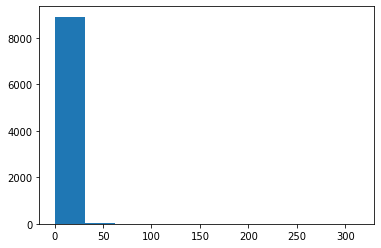

In [ ]:
import matplotlib.pyplot as plt
plt.hist(sorted(data['WEATHER_DELAY']))
plt.show()

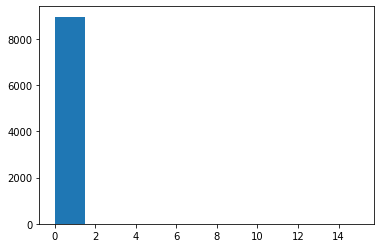

In [ ]:
import matplotlib.pyplot as plt
plt.hist(sorted(data['SECURITY_DELAY']))
plt.show()

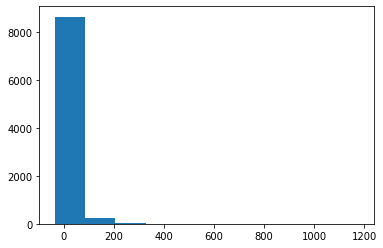

In [ ]:
import matplotlib.pyplot as plt
plt.hist(sorted(data['DEPARTURE_DELAY']))
plt.show()

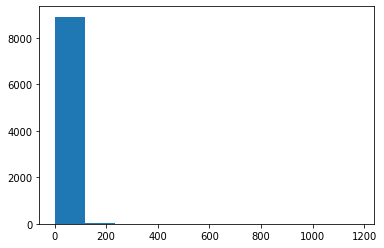

In [ ]:
import matplotlib.pyplot as plt
plt.hist(sorted(data['AIRLINE_DELAY']))
plt.show()

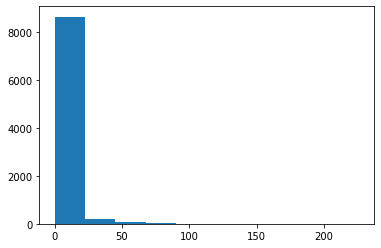

In [ ]:
import matplotlib.pyplot as plt
plt.hist(sorted(data['AIR_SYSTEM_DELAY']))
plt.show()

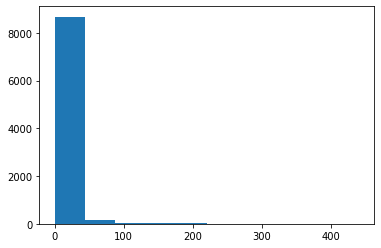

In [ ]:
import matplotlib.pyplot as plt
plt.hist(sorted(data['LATE_AIRCRAFT_DELAY']))
plt.show()

In [250]:
import pickle
pickle.dump(forest, open('randomforest90.pkl', 'wb'))
#pickled_model = pickle.load(open('model.pkl', 'rb'))
#pickled_model.predict(X_test)

In [242]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 7.114891734577535


In [243]:
from sklearn.metrics import mean_squared_error
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))


Mean Squared Error: 216.42938955392353
Root Mean Squared Error: 14.711539333255494


In [244]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9010833352489489


In [245]:
from sklearn.tree import DecisionTreeRegressor 
d= DecisionTreeRegressor()
d.fit(x_train,y_train)
y_pred=d.predict(x_test)
print(r2_score(y_test,y_pred))

0.8940668253431864


In [246]:
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 10.162764771460424
Mean Squared Error: 231.78149386845038
Root Mean Squared Error: 15.224371706853796


In [247]:
from xgboost import XGBRegressor
xg=XGBRegressor()
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
predictions = [round(value) for value in y_pred]
print(r2_score(y_test,y_pred))


[15:19:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9338328665453445


In [249]:
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))





Mean Absolute Error: 7.114863900702401
Mean Squared Error: 144.77350543677642
Root Mean Squared Error: 12.032186228478032
